In [2]:
import numpy as np
import matplotlib.pyplot as plt
import LinearRegression as LR

In [3]:
X_train = np.array([[2.5, 4.7, 5.2, 7.3, 9.5, 11.5]])
Y_train = np.array([[5.21, 7.70, 8.30, 11, 14.5, 15]])
X_train=np.transpose(X_train)
m = X_train.shape[0]
X_train = np.concatenate([np.ones(m).reshape(m, 1),X_train],axis=1)
Y_train=np.transpose(Y_train)
theta_in=np.ones(X_train.shape[1])

In [4]:
alpha = 0.01
lmda=1
tor=1
tau=1


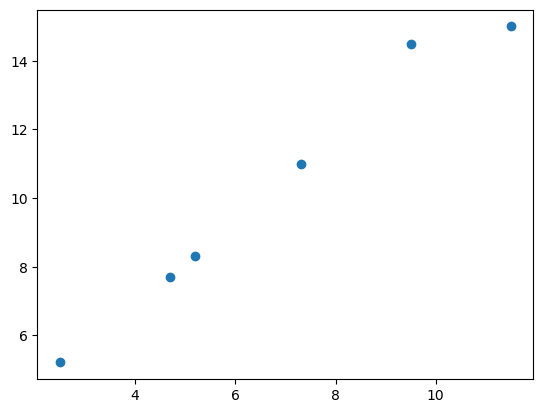

In [5]:
plt.scatter(X_train.T[1],Y_train)

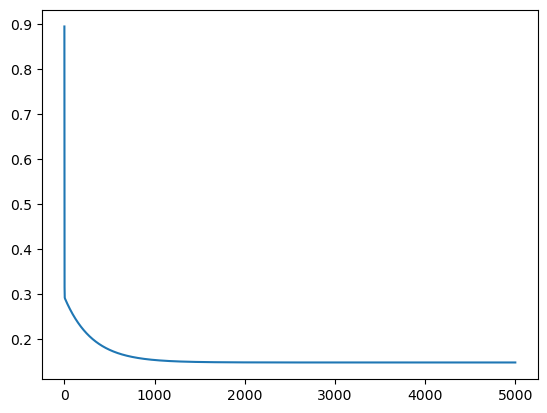

In [6]:
tht=LR.fitGD(X_train,Y_train,0.01,0,1,5000,theta_in)

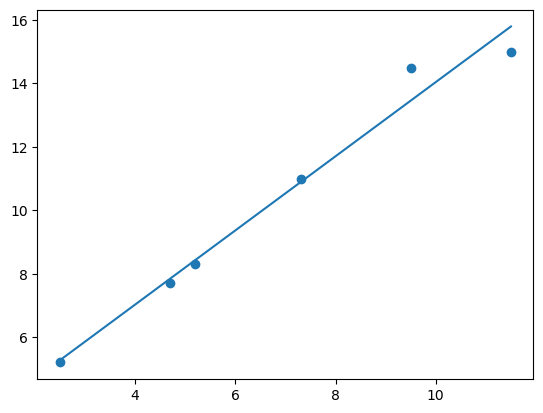

In [7]:
plt.scatter(X_train.T[1],Y_train)
plt.plot(X_train.T[1],LR.h(tht,X_train))

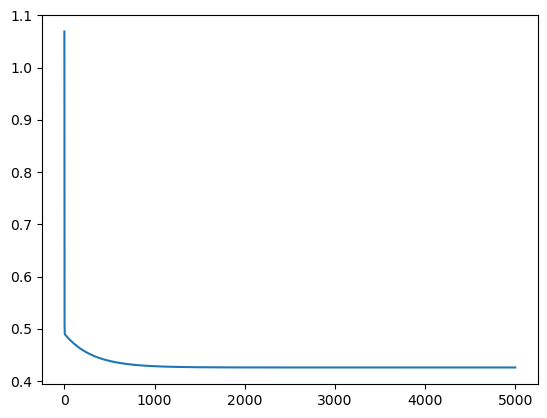

In [8]:
tht=LR.fitGD(X_train,Y_train,alpha,1,tor,5000,theta_in)

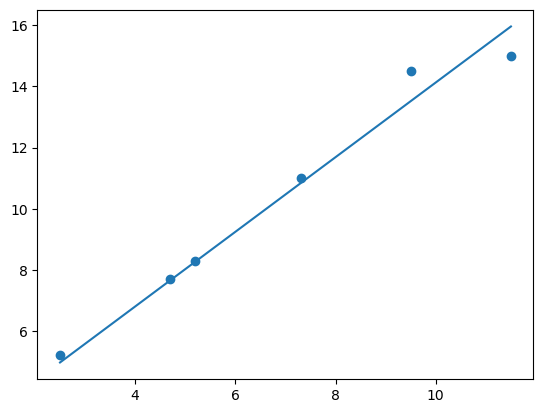

In [9]:
plt.scatter(X_train.T[1],Y_train)
plt.plot(X_train.T[1],LR.h(tht,X_train))

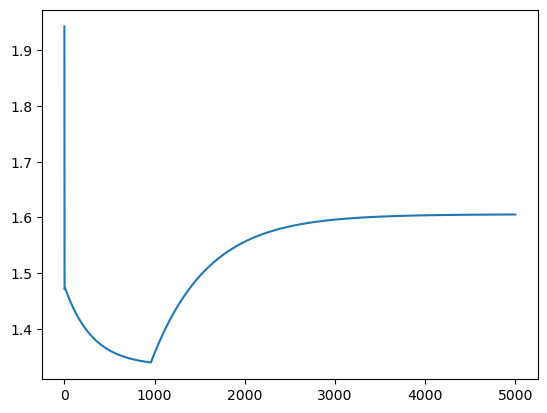

In [10]:
lmda=6
tht=LR.fitGD(X_train,Y_train,alpha,lmda,tor,5000,theta_in)


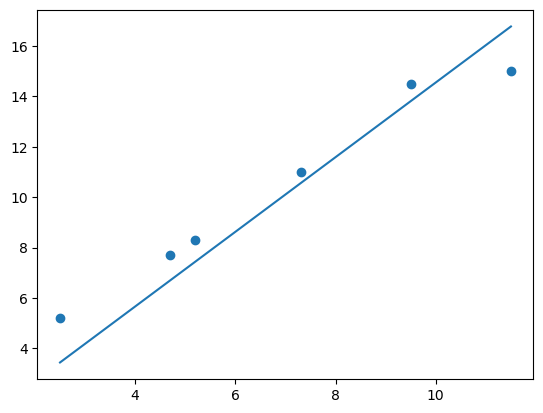

In [11]:
plt.scatter(X_train.T[1],Y_train)
plt.plot(X_train.T[1],LR.h(tht,X_train))

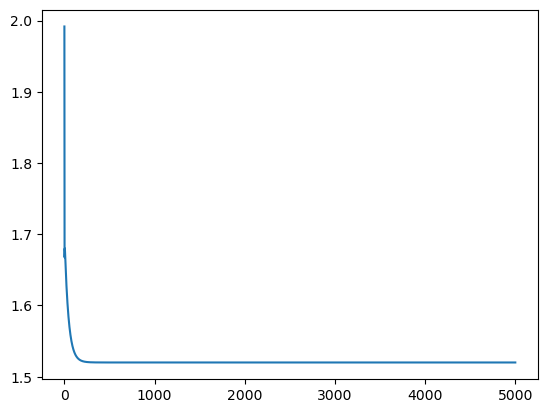

In [12]:
lmda=6
tor=2
tht=LR.fitGD(X_train,Y_train,alpha,lmda,tor,5000,theta_in)

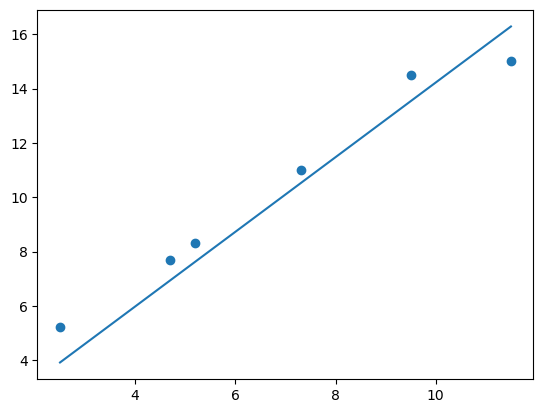

In [13]:
plt.scatter(X_train.T[1],Y_train)
plt.plot(X_train.T[1],LR.h(tht,X_train))

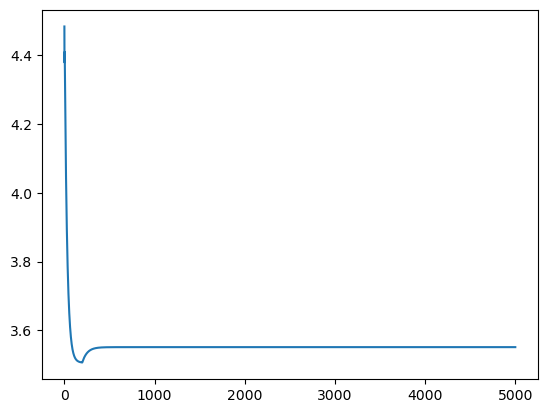

In [14]:
lmda=20
tor=3
tht=LR.fitGD(X_train,Y_train,alpha,lmda,tor,5000,theta_in)

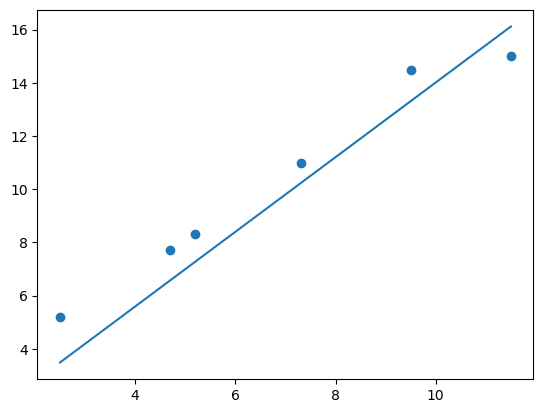

In [15]:
plt.scatter(X_train.T[1],Y_train)
plt.plot(X_train.T[1],LR.h(tht,X_train))

In [16]:
X_test = np.array([[3.5, 5, 6, 8, 10]])
X_test=X_test.T
m = X_test.shape[0]
X_test = np.concatenate([np.ones(m).reshape(m, 1),X_test],axis=1)

In [17]:
LR.h(tht,X_test)

array([ 4.88704358,  6.99319036,  8.39728822, 11.20548394, 14.01367966])

In [18]:

tht=LR.fitNormal(X_train,Y_train).T

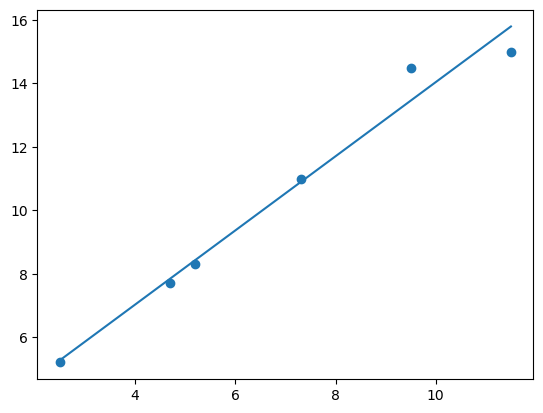

In [19]:
plt.scatter(X_train.T[1],Y_train)
plt.plot((X_train.T[1]).T,LR.h(tht,X_train).T)

In [20]:
X_test = np.array([[3.5, 5, 6, 8, 10]])
X_test=X_test.T
m = X_test.shape[0]
X_test = np.concatenate([np.ones(m).reshape(m, 1),X_test],axis=1)
LR.h(tht,X_test)

array([[ 6.45112002,  8.20263879,  9.37031797, 11.70567634, 14.0410347 ]])

In [55]:

Y_test1=np.zeros(X_test.shape[0])
Y_test2=np.zeros(X_test.shape[0])
Y_test3=np.zeros(X_test.shape[0])
Y_test4=np.zeros(X_test.shape[0])
Y_test5=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    Y_test1[i]=LR.locallyWeighted(X_test[i],X_train,Y_train,0.01)
    Y_test2[i]=LR.locallyWeighted(X_test[i],X_train,Y_train,0.1)
    Y_test3[i]=LR.locallyWeighted(X_test[i],X_train,Y_train,1)
    Y_test4[i]=LR.locallyWeighted(X_test[i],X_train,Y_train,10)
    Y_test5[i]=LR.locallyWeighted(X_test[i],X_train,Y_train,100)

In [56]:
Y_test1


array([0.        , 7.99215407, 0.        , 0.        , 0.        ])

In [57]:
Y_test2


array([ 6.34181595,  8.06      ,  9.53138374, 12.03536563, 15.25479452])

In [58]:
Y_test3

array([ 6.34619683,  8.06977833,  9.33866055, 12.11740229, 14.56612345])

In [59]:
Y_test4

array([ 6.42333936,  8.19731867,  9.37520439, 11.71859651, 14.0440817 ])

In [60]:
Y_test5


array([ 6.45081998,  8.20258191,  9.37036766, 11.70580578, 14.04106589])

In [29]:
Y_test = np.array([6.25, 8.2, 9.5, 12.1, 14.7])

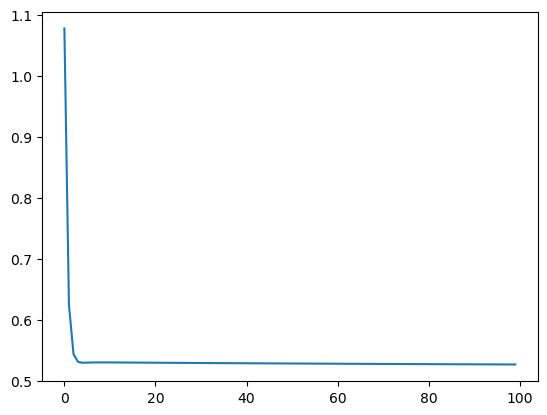

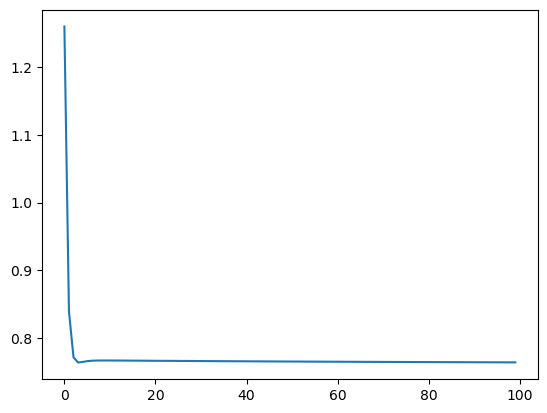

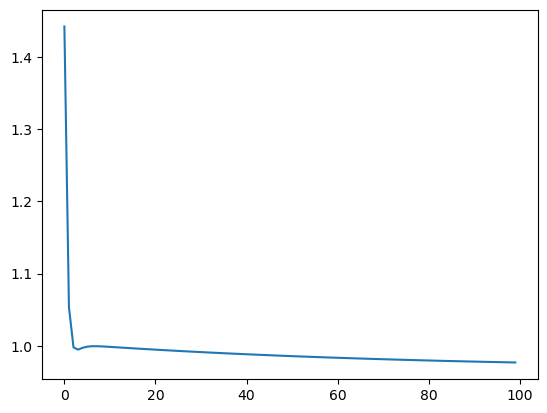

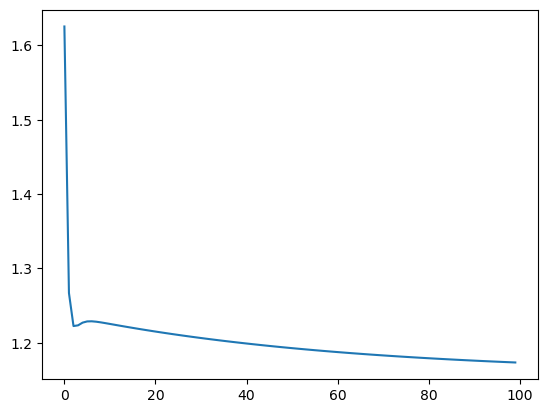

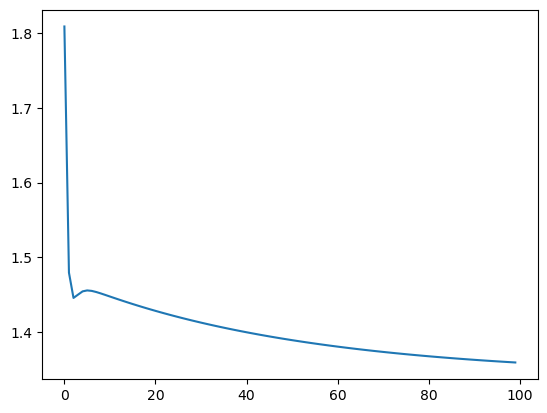

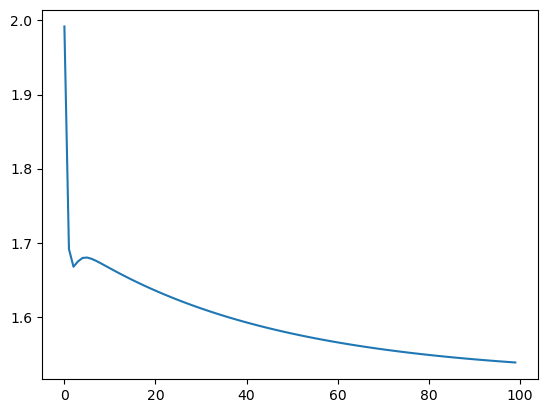

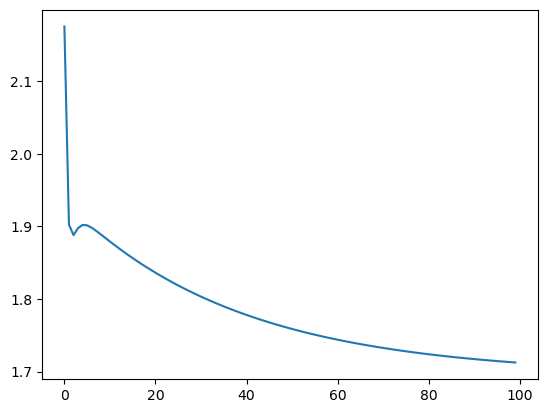

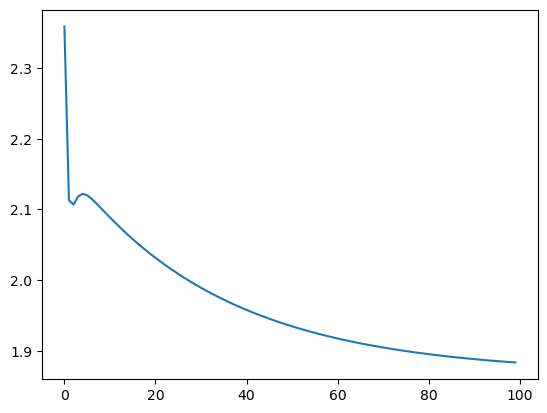

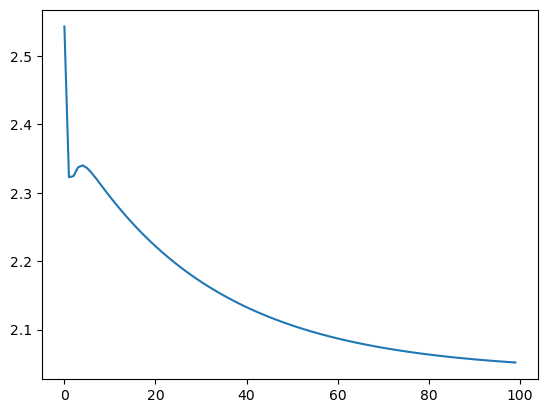

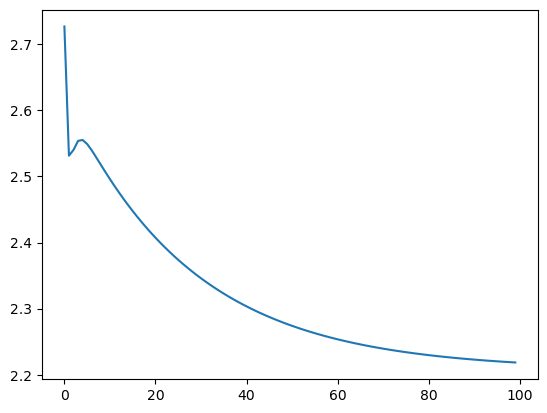

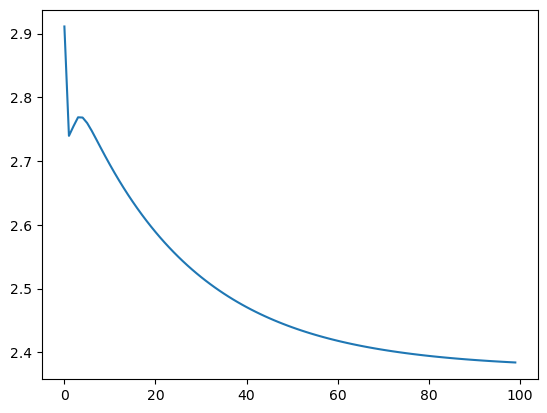

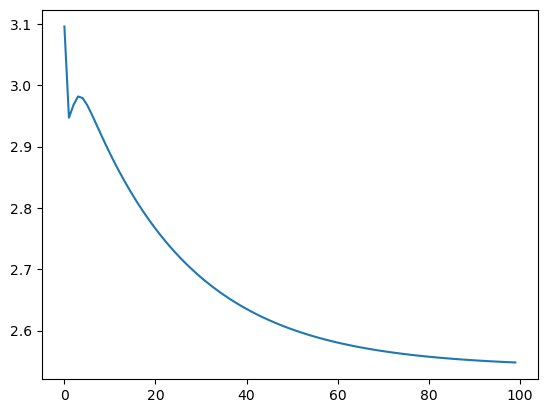

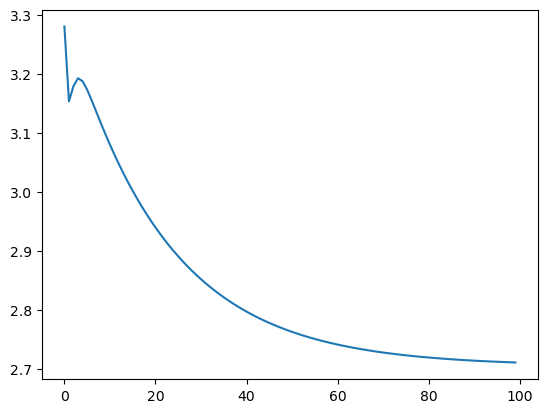

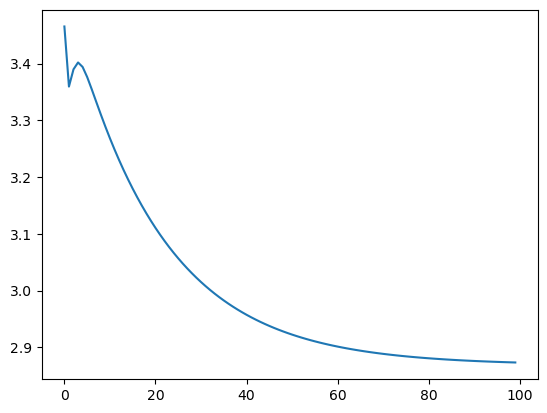

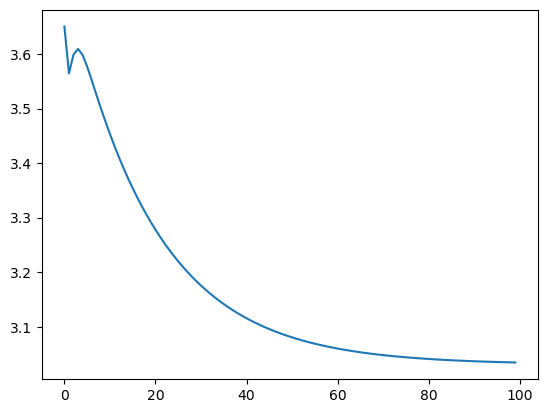

In [32]:
tor=2
thta=np.zeros((15,2))
for i in range(15):
    thta[i]=LR.fitGD(X_train,Y_train,alpha,i+1,tor,100,theta_in)


In [47]:
J_train=np.zeros(15)
for i in range(15):
    J_train[i]=max(np.absolute((np.asarray(Y_train).reshape(-1) - LR.h(thta[i],X_train))))**2/(2*Y_train.shape[0])


In [49]:
J_test=np.zeros(15)
X_test = np.array([[3.5, 5, 6, 8, 10]])
X_test=X_test.T
m = X_test.shape[0]
X_test = np.concatenate([np.ones(m).reshape(m, 1),X_test],axis=1)
for i in range(15):
    J_test[i]=max(np.absolute((np.asarray(Y_test).reshape(-1) - LR.h(thta[i],X_test))))**2/(2*Y_test.shape[0])


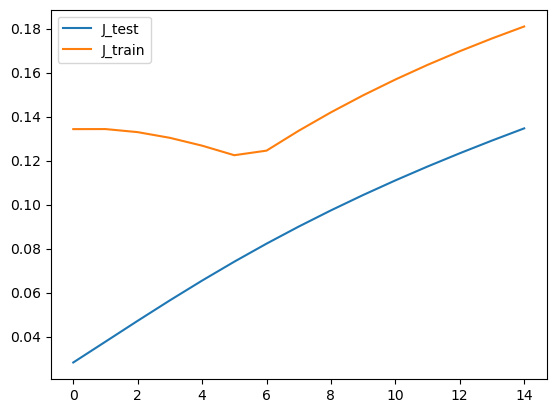

In [52]:
plt.plot(J_test,label="J_test")
plt.plot(J_train,label="J_train")
plt.legend()

In [64]:
X_test=np.array([3.5,5,6,8,10])
Y_test_pred = np.zeros((10,X_test.shape[0]))
tau=0.00001
for i in range(10):
    for j in range(X_test.shape[0]):
        Y_test_pred[i][j]=LR.locallyWeighted(X_test[j],X_train,Y_train,tau)
    tau=tau*10

Y_train_pred = np.zeros((10,X_train.shape[0]))
tau=0.00001
for i in range(10):
    for j in range(X_test.shape[0]):
        Y_train_pred[i][j]=LR.locallyWeighted(X_train[j][1],X_train,Y_train,tau)
    tau=tau*10

In [66]:
J_test=np.zeros(10)
X_test = np.array([[3.5, 5, 6, 8, 10]])
for i in range(10):
    J_test[i]=max(np.absolute((np.asarray(Y_test).reshape(-1) - Y_test_pred[i])))**2/(2*Y_test.shape[0])


In [68]:
J_train=np.zeros(10)
for i in range(10):
    J_train[i]=max(np.absolute((np.asarray(Y_train).reshape(-1) - Y_train_pred[i])))**2/(2*Y_train.shape[0])


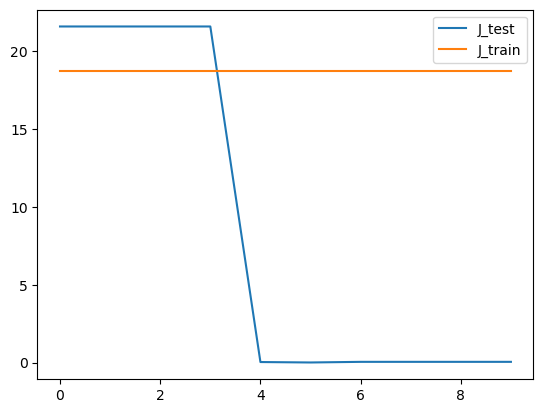

In [69]:
plt.plot(J_test,label="J_test")
plt.plot(J_train,label="J_train")
plt.legend()